In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("D:/Project/Exchange rate with leading.csv", index_col = 'Year')
data.head()

,Exchange Rate,Exports,Imports,GDP,Lending Rate,Real int rate,Inflation,FDI,Bond Yield,Crude Oil Price
Year,,,,,,,,,,
2004,45.32,75045.79,99815.19,709148.51,10.92,4.91,3.77,5429250990,5.9314,1737.11
2005,44.10,97897.66,139666.57,820381.60,10.75,4.86,4.25,7269407226,6.9710,2356.03
2006,45.31,120156.18,176526.42,940259.89,11.19,2.57,5.80,20029119267,7.6628,2915.39
2007,41.35,153348.71,234639.50,1216736.45,13.02,5.68,6.37,25227740887,7.9529,2922.38
2008,43.51,195055.03,321398.91,1198895.15,13.31,3.77,8.35,43406277076,7.8547,4157.00


In [3]:
data.describe()

,Exchange Rate,Exports,Imports,GDP,Lending Rate,Real int rate,Inflation,FDI,Bond Yield,Crude Oil Price
count,19.000000,19.000000,19.000000,1.900000e+01,19.000000,19.000000,19.000000,1.900000e+01,19.000000,19.000000
mean,57.651053,255888.063158,384967.363684,1.961916e+06,10.292105,3.948421,6.621053,3.514506e+10,7.385826,4075.299474
std,12.413039,100227.702527,156802.855710,8.001913e+05,1.390258,2.557191,2.621874,1.477889e+10,0.791078,1498.418558
min,41.350000,75045.790000,99815.190000,7.091485e+05,8.330000,-1.980000,3.330000,5.429251e+09,5.931400,1737.110000
25%,45.525000,180121.715000,289524.170000,1.279312e+06,9.460000,2.520000,4.580000,2.631231e+10,6.933550,2949.100000
50%,58.600000,275589.570000,392215.220000,1.856722e+06,10.170000,4.810000,6.370000,3.649865e+10,7.662800,3610.010000
75%,67.795000,316348.430000,473902.010000,2.661535e+06,10.835000,5.520000,8.630000,4.423403e+10,7.903800,4980.830000
max,78.600000,453196.570000,731907.820000,3.416646e+06,13.310000,7.560000,11.990000,6.436236e+10,8.555100,7620.270000


In [4]:
data.columns

Index(['Exchange Rate', 'Exports', 'Imports', 'GDP', 'Lending Rate',
       'Real int rate', 'Inflation', 'FDI', 'Bond Yield', 'Crude Oil Price'],
      dtype='object')

In [5]:
data.isnull().sum()

Exchange Rate      0
Exports            0
Imports            0
GDP                0
Lending Rate       0
Real int rate      0
Inflation          0
FDI                0
Bond Yield         0
Crude Oil Price    0
dtype: int64

In [6]:
df = pd.DataFrame(data)

def detect_outliers_zscore(df):
    outliers = pd.DataFrame()
    for col in df.columns:
        z_scores = (df[col] - df[col].mean()) / df[col].std(ddof=0)
        outliers[col] = np.abs(z_scores) > 3
    return outliers

outliers = detect_outliers_zscore(df)

outliers = detect_outliers_zscore(df)

if outliers.any().any():
    print(outliers)
else:
    print("No outliers Detected")

No outliers Detected


In [7]:
data.corr()

,Exchange Rate,Exports,Imports,GDP,Lending Rate,Real int rate,Inflation,FDI,Bond Yield,Crude Oil Price
Exchange Rate,1.000000,0.807287,0.745137,0.937982,-0.709332,0.085317,-0.375659,0.753687,-0.335451,0.463232
Exports,0.807287,1.000000,0.987943,0.919240,-0.641564,-0.226159,0.014124,0.690835,0.120924,0.833198
Imports,0.745137,0.987943,1.000000,0.881177,-0.591341,-0.277503,0.071282,0.641700,0.185617,0.876974
GDP,0.937982,0.919240,0.881177,1.000000,-0.726158,-0.103654,-0.224731,0.796419,-0.188932,0.586944
Lending Rate,-0.709332,-0.641564,-0.591341,-0.726158,1.000000,0.341741,0.152867,-0.376925,0.245991,-0.343715
Real int rate,0.085317,-0.226159,-0.277503,-0.103654,0.341741,1.000000,-0.534458,0.057264,-0.032159,-0.348181
Inflation,-0.375659,0.014124,0.071282,-0.224731,0.152867,-0.534458,1.000000,-0.050847,0.479792,0.282258
FDI,0.753687,0.690835,0.641700,0.796419,-0.376925,0.057264,-0.050847,1.000000,-0.142075,0.345730
Bond Yield,-0.335451,0.120924,0.185617,-0.188932,0.245991,-0.032159,0.479792,-0.142075,1.000000,0.430845
Crude Oil Price,0.463232,0.833198,0.876974,0.586944,-0.343715,-0.348181,0.282258,0.345730,0.430845,1.000000


In [8]:
data.dtypes

Exchange Rate      float64
Exports            float64
Imports            float64
GDP                float64
Lending Rate       float64
Real int rate      float64
Inflation          float64
FDI                  int64
Bond Yield         float64
Crude Oil Price    float64
dtype: object

<AxesSubplot:>

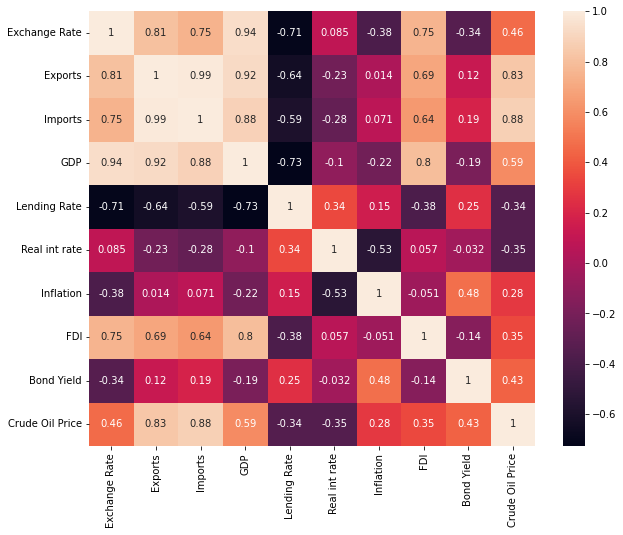

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot = True)

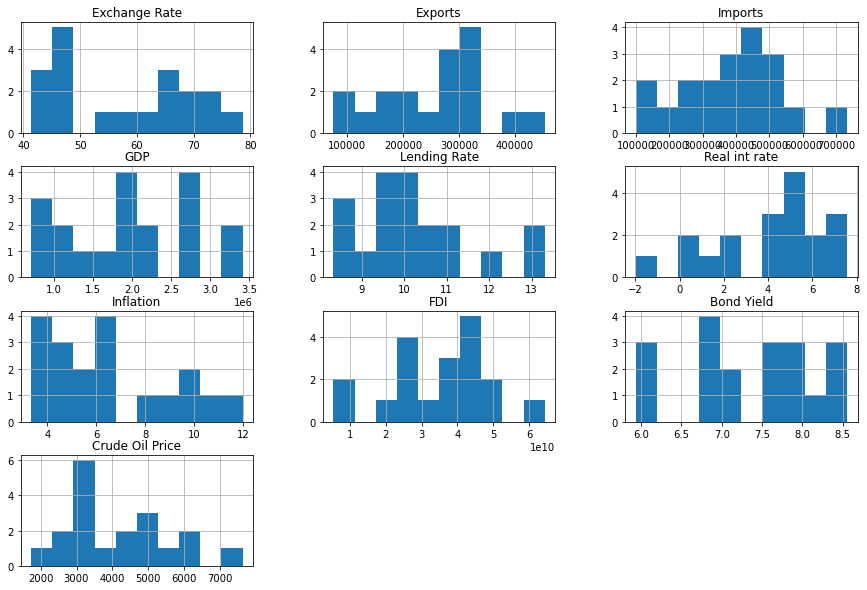

In [10]:
df.hist(figsize=(15,10))
plt.show()

In [11]:
from sklearn.preprocessing import MinMaxScaler

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Linear Regression

Model Without leading indicators

In [13]:
model=LinearRegression()
x = data[[ 'Exports','Imports', 'GDP', 'Lending Rate','Real int rate', 'FDI','Inflation']]
y = data['Exchange Rate']

In [14]:
x_train,x_test,y_train,y_test= train_test_split(x,y,random_state= 42,train_size=0.7)

In [15]:
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)

In [16]:
x_test_scaled = scaler.transform(x_test)

In [17]:
model.fit(x_train_scaled,y_train)
Y_pred=model.predict(x_test_scaled)

In [18]:
accuracy_df = pd.DataFrame({'y_test': y_test, 'y_pred': Y_pred})

print(accuracy_df)

      y_test     y_pred
Year                   
2004   45.32  40.769952
2009   48.41  43.109802
2015   64.15  61.566327
2005   44.10  42.220378
2012   53.44  52.312423
2020   74.10  66.297963


In [19]:
def plot_predictions(y_test, y_pred):
    plt.figure(figsize=(8, 6))
    plt.plot(np.arange(len(y_test)), y_test, label='Actual Values (y_test)', color='blue')
    plt.plot(np.arange(len(y_pred)), y_pred, label='Predicted Values (Y_pred)', color='red')
    plt.xlabel('Index')
    plt.ylabel('Values')
    plt.title('Actual vs Predicted Values')
    plt.legend()
    plt.show()

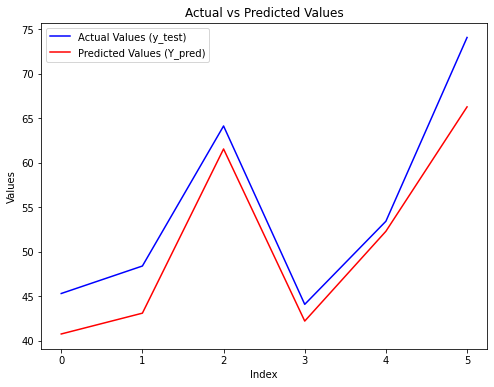

In [20]:
plot_predictions(y_test, Y_pred)

In [21]:
mse = mean_squared_error(y_test, Y_pred)
r2 = r2_score(y_test, Y_pred)
print("mse:", round(mse, 4))
print("r2:", round(r2, 4))

mse: 20.1911
r2: 0.8286


Model with leading indicators

In [22]:
model2 = LinearRegression()
x = data[['GDP','Exports','Imports','Lending Rate', 'Real int rate', 'FDI','Inflation','Bond Yield', 'Crude Oil Price']]
Y = data['Exchange Rate']

In [23]:
x_train,x_test,Y_train,Y_test= train_test_split(x,Y,random_state= 42,train_size=0.7)

In [24]:
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [25]:
model2.fit(x_train_scaled,Y_train)
Y_pred=model2.predict(x_test_scaled)

In [26]:
accuracy_df = pd.DataFrame({'y_test': Y_test, 'y_pred': Y_pred})

print(accuracy_df)

      y_test     y_pred
Year                   
2004   45.32  44.693995
2009   48.41  46.299684
2015   64.15  57.566934
2005   44.10  44.863375
2012   53.44  47.309084
2020   74.10  75.844711


In [27]:
mse = mean_squared_error(y_test, Y_pred)
r2 = r2_score(y_test, Y_pred)
print("mse:", round(mse, 4))
print("r2:", round(r2, 4))

mse: 14.8995
r2: 0.8735


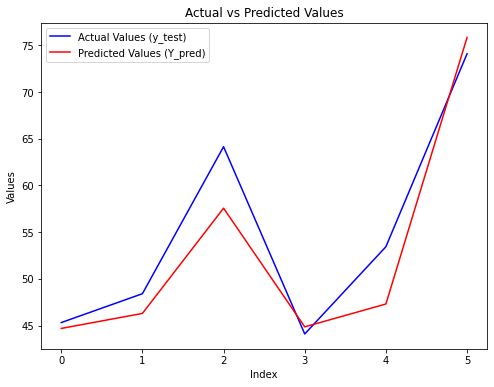

In [28]:
plot_predictions(Y_test, Y_pred)

# Random Forest

Model without leading indicators

In [29]:
from sklearn.ensemble import RandomForestRegressor

In [30]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
X = data[['Exports','Imports', 'GDP', 'Lending Rate', 'Real int rate', 'FDI']]
y = data['Exchange Rate']

X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
X_train1_scaled = scaler.fit_transform(X_train1)
X_test1_scaled = scaler.transform(X_test1)

In [33]:
rf_model.fit(X_train1_scaled, y_train1)
y_pred_1 = rf_model.predict(X_test1_scaled)

In [34]:
accuracy_df = pd.DataFrame({'y_test': y_test1, 'y_pred': y_pred_1})

print(accuracy_df)

      y_test   y_pred
Year                 
2004   45.32  44.5518
2009   48.41  43.9900
2015   64.15  62.7737
2005   44.10  44.5518


In [35]:
feature_importance = pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importance = feature_importance.sort_values(ascending=False)
feature_importance

GDP              0.661154
FDI              0.092349
Lending Rate     0.083970
Imports          0.063794
Exports          0.052800
Real int rate    0.045933
dtype: float64

In [36]:
mse = mean_squared_error(y_test1, y_pred_1)
r2 = r2_score(y_test1, y_pred_1)
print("mse:", round(mse, 4))
print("r2:", round(r2, 4))

mse: 5.5562
r2: 0.914


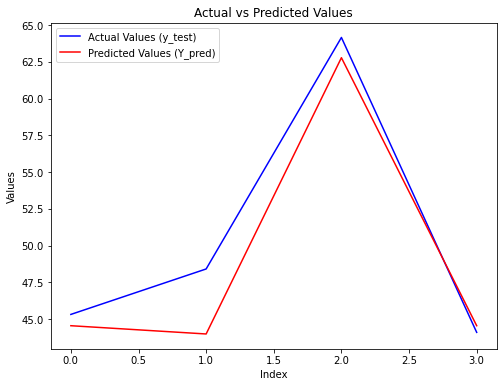

In [37]:
plot_predictions(y_test1, y_pred_1)

Model with Leading Indicators

In [38]:
rf_model2 = RandomForestRegressor(n_estimators=100, random_state=42)
X = data[['Exports','Imports', 'GDP', 'Lending Rate', 'Real int rate', 'FDI', 'Bond Yield', 'Crude Oil Price']]
Y = data['Exchange Rate']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [39]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [40]:
rf_model2.fit(X_train_scaled, Y_train)
y_pred1 = rf_model2.predict(X_test_scaled)

In [41]:
accuracy_df = pd.DataFrame({'y_test': Y_test, 'y_pred': y_pred1})

print(accuracy_df)

      y_test   y_pred
Year                 
2004   45.32  45.9903
2009   48.41  45.3998
2015   64.15  63.0040
2005   44.10  46.0319


In [42]:
feature_importance = pd.Series(rf_model2.feature_importances_, index=X.columns)
feature_importance = feature_importance.sort_values(ascending=False)
feature_importance

GDP                0.614055
FDI                0.104870
Lending Rate       0.068671
Bond Yield         0.064407
Exports            0.055137
Real int rate      0.042828
Crude Oil Price    0.025322
Imports            0.024710
dtype: float64

In [46]:
mse = mean_squared_error(Y_test, y_pred1)
r2 = r2_score(Y_test, y_pred1)
print("mse:", round(mse, 4))
print("r2:", round(r2, 4))

mse: 3.639
r2: 0.9437


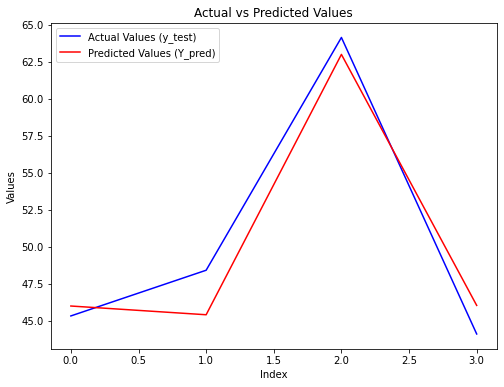

In [47]:
plot_predictions(Y_test, y_pred1)

# Time Series

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [49]:
df = pd.read_csv("D:/Project/Exchange rate ARIMA.csv", index_col = 'Year', parse_dates=['Year'])
df.head()

,Exchange Rate
Year,
2004-01-01,45.32
2005-01-01,44.10
2006-01-01,45.31
2007-01-01,41.35
2008-01-01,43.51


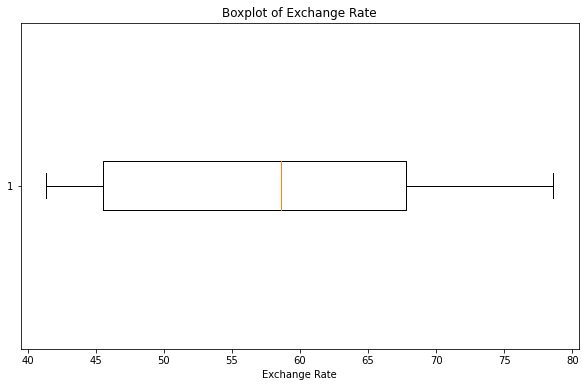

In [50]:
plt.figure(figsize=(10, 6))
plt.boxplot(df['Exchange Rate'], vert=False)
plt.xlabel('Exchange Rate')
plt.title('Boxplot of Exchange Rate')
plt.show()

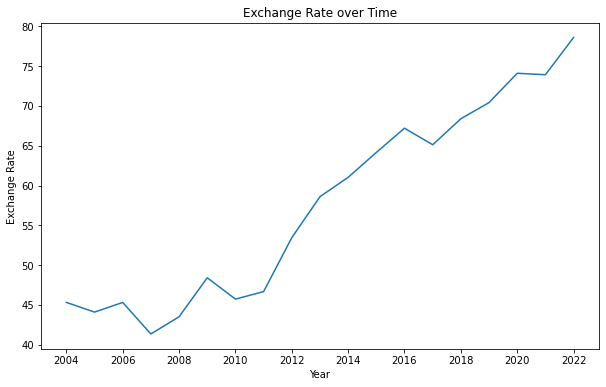

In [51]:
plt.figure(figsize=(10, 6))
plt.plot(df['Exchange Rate'])
plt.xlabel('Year')
plt.ylabel('Exchange Rate')
plt.title('Exchange Rate over Time')
plt.show()

In [52]:
train_size = int(len(df) * 0.8)
train_df = df.iloc[:train_size]
test_df = df.iloc[train_size:]

# ARIMA Prediction

In [53]:
import pmdarima as pm
from statsmodels.tsa.arima.model import ARIMA
p, d, q = 1, 2, 2
model = ARIMA(train_df['Exchange Rate'], order=(p, d, q))
fitted_model = model.fit()

D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


In [54]:
start_index = test_df.index[0]
end_index = test_df.index[-1]
predicted_values = fitted_model.predict(start=start_index, end=end_index)

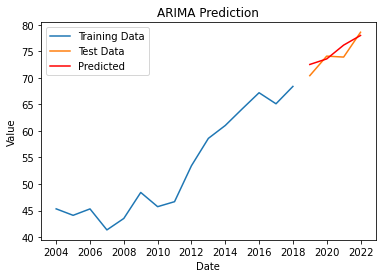

In [55]:
plt.plot(train_df.index, train_df['Exchange Rate'], label='Training Data')
plt.plot(test_df.index, test_df['Exchange Rate'], label='Test Data')
plt.plot(test_df.index, predicted_values, label='Predicted', color='red')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('ARIMA Prediction')
plt.legend()
plt.show()

In [56]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(test_df.values, predicted_values)
mse = mean_squared_error(test_df.values, predicted_values)
rmse = np.sqrt(mse)

print(f'Mean Absolute Error (MAE): {round(mae, 4)}')
print(f'Mean Squared Error (MSE): {round(mse, 4)}')
print(f'Root Mean Squared Error (RMSE): {round(rmse, 4)}')

Mean Absolute Error (MAE): 1.3735
Mean Squared Error (MSE): 2.5418
Root Mean Squared Error (RMSE): 1.5943


# ARIMA Forecast

In [57]:
Model2 = ARIMA(df, order=(p, d, q))
fitted_Model2 = Model2.fit()
forecast_years = 8
forecast_index = pd.date_range(start='2022-01-01', periods=forecast_years, freq='Y')
forecast_values = fitted_Model2.forecast(steps=forecast_years)

D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


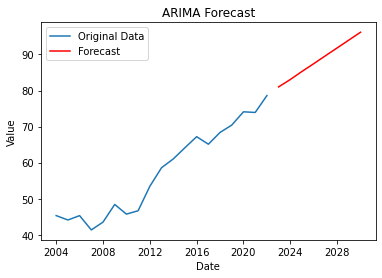

In [58]:
plt.plot(df.index, df['Exchange Rate'], label='Original Data')
plt.plot(forecast_index, forecast_values, label='Forecast', color='red')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('ARIMA Forecast')
plt.legend()
plt.show()

In [59]:
forecast_values

2023-01-01    81.000328
2024-01-01    83.050116
2025-01-01    85.301820
2026-01-01    87.437217
2027-01-01    89.639608
2028-01-01    91.803411
2029-01-01    93.989441
2030-01-01    96.162667
Freq: AS-JAN, Name: predicted_mean, dtype: float64

# SARIMA Prediciton

In [60]:
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
train_size = int(len(df) * 0.8)
train_df3 = df.iloc[:train_size]
test_df3 = df.iloc[train_size:]

In [61]:
order = (1, 2, 1)
seasonal_order = (0, 1, 1, 2)
model3 = SARIMAX(train_df3['Exchange Rate'], order=order, seasonal_order=seasonal_order)
fitted_model3 = model3.fit()

D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
D:\anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


In [62]:
start_index = test_df3.index[0]
end_index = test_df3.index[-1]
predicted_values3 = fitted_model3.predict(start=start_index, end=end_index)

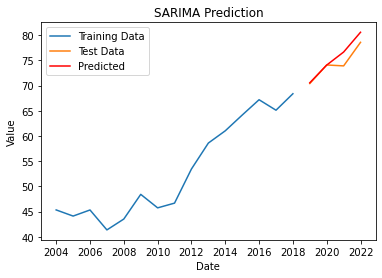

In [63]:
plt.plot(train_df3.index, train_df3['Exchange Rate'], label='Training Data')
plt.plot(test_df3.index, test_df3['Exchange Rate'], label='Test Data')
plt.plot(test_df3.index, predicted_values3, label='Predicted', color='red')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('SARIMA Prediction')
plt.legend()
plt.show()

In [64]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(test_df3.values, predicted_values3)
mse = mean_squared_error(test_df3.values, predicted_values3)
rmse = np.sqrt(mse)

print(f'Mean Absolute Error (MAE): {round(mae, 4)}')
print(f'Mean Squared Error (MSE): {round(mse, 4)}')
print(f'Root Mean Squared Error (RMSE): {round(rmse, 4)}')

Mean Absolute Error (MAE): 1.2286
Mean Squared Error (MSE): 2.8976
Root Mean Squared Error (RMSE): 1.7022


# SARIMA Forecast

In [70]:
order = (1, 2, 1)
seasonal_order = (0, 1, 1, 2)

In [71]:
model4 = SARIMAX(df['Exchange Rate'], order=order, seasonal_order=seasonal_order)
fitted_model4 = model4.fit()
forecast_years = 8
forecast_index2 = pd.date_range(start='2022-01-01', periods=forecast_years, freq='Y')
forecast_values2 = fitted_model4.forecast(steps=forecast_years)

D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)
D:\anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-JAN will be used.
  self._init_dates(dates, freq)


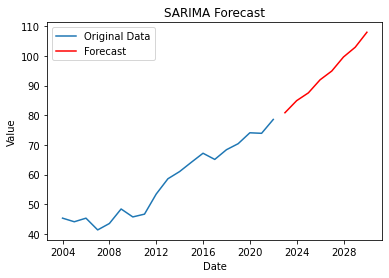

In [72]:
plt.plot(df.index, df['Exchange Rate'], label='Original Data')
plt.plot(forecast_index2, forecast_values2, label='Forecast', color='red')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('SARIMA Forecast')
plt.legend()
plt.show()

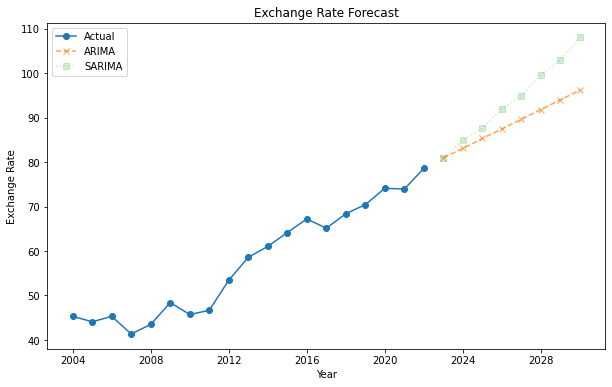

In [73]:
plt.figure(figsize=(10, 6))
plt.plot(df['Exchange Rate'], label='Actual', linestyle='-', marker='o')
plt.plot(forecast_values, label='ARIMA', linestyle='--', marker='x', alpha=0.7)
plt.plot(forecast_values2, label='SARIMA', linestyle=':', marker='s', alpha=0.2)
plt.xlabel('Year')
plt.ylabel('Exchange Rate')
plt.title('Exchange Rate Forecast')
plt.legend()
plt.show()

In [75]:
forecast_values2

2023-01-01     80.857521
2024-01-01     84.931233
2025-01-01     87.561445
2026-01-01     91.962178
2027-01-01     94.921541
2028-01-01     99.651326
2029-01-01    102.939746
2030-01-01    107.998588
Freq: AS-JAN, Name: predicted_mean, dtype: float64